In [2]:
from torch.utils.data.dataset import Dataset
import os
from os.path import isfile, join
from PIL import Image
from torch.utils.data import DataLoader
from torchvision import transforms
import torch
import torch.optim as optim
from torch.autograd import Variable
from tqdm import tqdm_notebook as tqdm
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch import nn

%matplotlib inline

# Create pytorch dataset

In my case I previously splitted the training images and masks into a validation set with 10% of the training content. If you do nota have this splitting just set `subset='train'` or `subset='test'` when creating the dataset

In [3]:
class CARVANA(Dataset):
    """
        CARVANA dataset that contains car images as .jpg. Each car has 16 images
        taken in different angles.
    """

    def __init__(self, root, subset="train", transform=None):


        # initialize variables
        self.root = os.path.expanduser(root)
        self.transform = transform
        self.subset = subset
        self.data_path, self.labels_path = [], []

        def load_images(path):

            images_dir = [join(path, f) for f in os.listdir(path) if isfile(join(path, f))]
            images_dir.sort()

            return images_dir

        # load the data regarding the subset
        if self.subset == "train":
            self.data_path = load_images(self.root + "/train")
            self.labels_path = load_images(self.root + "/train_masks")
        elif self.subset == "val":
            self.data_path = load_images(self.root + "/val")
            self.labels_path = load_images(self.root + "/val_masks")

    def __getitem__(self, index):
        """

        :param index:
        :return: tuple (img, target) with the input data and its label
        """

        # load image and labels
        img = Image.open(self.data_path[index])
        target = Image.open(self.labels_path[index]) if not self.subset == 'test' else None

        # apply transforms to both
        if self.transform is not None:
            img = self.transform(img)
            target = self.transform(target)

        return img, target

    def __len__(self):
        return len(self.data_path)


## Check that the dataset was correctly created

We create a new objetc with our training set. Images and targets are scaled to 256*256.

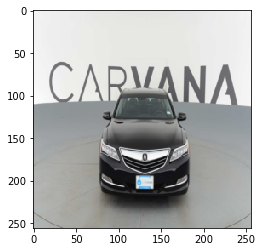

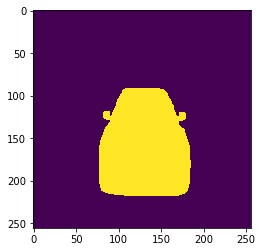

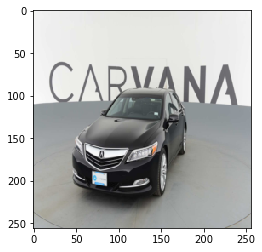

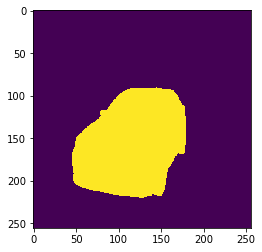

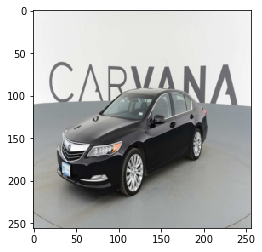

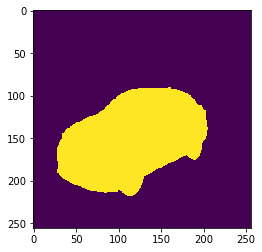

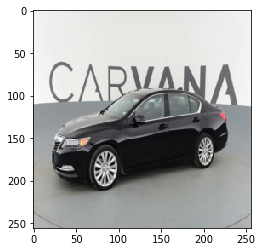

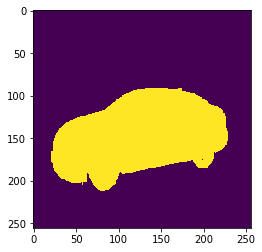

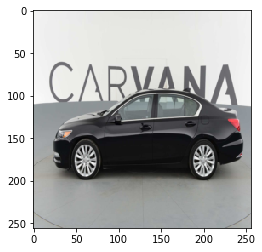

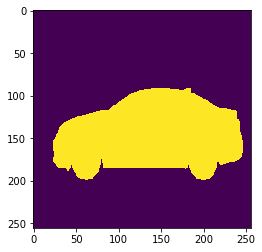

In [21]:
# create datasets
train_dataset = CARVANA(root='./data',
                              subset="train",
                              transform=transforms.Compose([
                                  transforms.Scale((256,256)),
                                  transforms.ToTensor()])
                              )

# define a simple function to show image-labels
def im_show(img_list):
    """
    It receives a list of images and plots them together
    :param img_list:
    :return:
    """
    to_PIL = transforms.ToPILImage()
        
    for idx, img in enumerate(img_list):
        img = np.array(to_PIL(img))
        #plt.subplot(100 + 10 * len(img_list) + (idx + 1))
        fig = plt.imshow(img)
        #fig.axes.get_xaxis().set_visible(False)
        #fig.axes.get_yaxis().set_visible(False)
    
        plt.show()

img_list = []
for i in range(5):
    img, label = train_dataset[i]
    img_list.append(img)
    img_list.append(label)
    
im_show(img_list)
    